In [1]:
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

#### `npy` 이미지 처리

In [4]:
def pprint(arr):
  print(f'type:{type(arr)}')
  print(f'shape:{arr.shape}, ndim:{arr.ndim}, dtype:{arr.dtype}')
  print(f'array data: \n {arr}')

In [5]:
# npy 이미지 데이터 읽어오기
imgs = np.load('ant_bee_img.npy')
pprint(imgs)

type:<class 'numpy.ndarray'>
shape:(157, 4097), ndim:2, dtype:int64
array data: 
 [[126 137 100 ... 169 163   0]
 [128 132 129 ... 110  88   0]
 [190 190 190 ... 129 110   0]
 ...
 [118 116 128 ... 114 110   1]
 [ 55  33  28 ...  88  81   1]
 [ 18  18  16 ... 205 207   1]]


In [12]:
4097/64 
# 64 * 64 = 4096
# 끝에 레이블을 추가해서 64로 나누었을 때 결과 소수점 

64.015625

In [15]:
# 첫번째 이미지 값을 이용해 이미지 출력 (64*64)
X = imgs[0][:-1] # 맨앞~마지막 하나의 데이터(레이블) 뺸 값
y = imgs[0][-1]  # 레이블: 맨 마지막 값

pprint(X.reshape(64, 64)) # 다시 (64*64)의 해상도로 만들어주기
print()
pprint(y)

type:<class 'numpy.ndarray'>
shape:(64, 64), ndim:2, dtype:int64
array data: 
 [[126 137 100 ... 122  54 106]
 [107 143  82 ... 128  40  66]
 [119 149  61 ...  94  33  33]
 ...
 [ 94 114  91 ...  63 154 188]
 [ 72  37  59 ... 149 181 173]
 [ 67  80  59 ... 184 169 163]]

type:<class 'numpy.int64'>
shape:(), ndim:0, dtype:int64
array data: 
 0


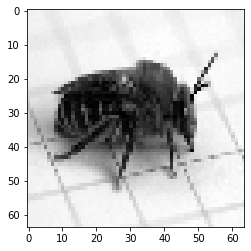

bee 이미지


In [21]:
X = imgs[75][:-1] # 맨앞~마지막 하나의 데이터(레이블) 뺸 값
y = imgs[75][-1]  # 레이블: 맨 마지막 값

plt.imshow(X.reshape(64, 64), cmap='gray')
plt.show()

if y == 0:
  print('ant 이미지')
elif  y == 1:
  print('bee 이미지')
else:
  print('확인 불가')

#### `npz` 이미지 처리

In [22]:
# npz 이미지 파일 읽어오기
imgs = np.load('ant_bee_arr.npz')
imgs.files


['arr_0', 'arr_1']

In [25]:
pprint(imgs['arr_0'])
#pprint(imgs['arr_1'])

type:<class 'numpy.ndarray'>
shape:(157, 4096), ndim:2, dtype:int64
array data: 
 [[126 137 100 ... 184 169 163]
 [128 132 129 ... 122 110  88]
 [190 190 190 ... 122 129 110]
 ...
 [118 116 128 ... 109 114 110]
 [ 55  33  28 ...  80  88  81]
 [ 18  18  16 ... 187 205 207]]


In [24]:
4096**(1/2) # 루트 씌우기

64.0

In [28]:
# 픽셀 정보 이미지 
X = imgs['arr_0']
X_0 = X[0].reshape(64, 64) # 전체를 reshape하면 섞여버려? -> n번쨰 데이터 지정해서 실행 

# 레이블 정보
y = imgs['arr_1']

pprint(X_0)


type:<class 'numpy.ndarray'>
shape:(64, 64), ndim:2, dtype:int64
array data: 
 [[126 137 100 ... 122  54 106]
 [107 143  82 ... 128  40  66]
 [119 149  61 ...  94  33  33]
 ...
 [ 94 114  91 ...  63 154 188]
 [ 72  37  59 ... 149 181 173]
 [ 67  80  59 ... 184 169 163]]


In [29]:
X_2 = X.reshape(157, 64, 64)

In [31]:
X_2[0][0]

array([126, 137, 100,  80,  84, 166, 160, 162, 161, 117,  91, 102, 126,
        91,  61,  30, 151, 139, 110, 100,  98,  50, 128,  33,  63,  97,
       149, 127, 190,  56,  28,  84, 139,  65, 168, 190, 177, 139, 122,
       164, 172, 225, 240, 156, 173, 181, 207, 227, 233, 235, 245, 238,
       186, 128, 141,  40, 172, 161, 116, 126,  44, 122,  54, 106])

In [32]:
X_2[0]

array([[126, 137, 100, ..., 122,  54, 106],
       [107, 143,  82, ..., 128,  40,  66],
       [119, 149,  61, ...,  94,  33,  33],
       ...,
       [ 94, 114,  91, ...,  63, 154, 188],
       [ 72,  37,  59, ..., 149, 181, 173],
       [ 67,  80,  59, ..., 184, 169, 163]])

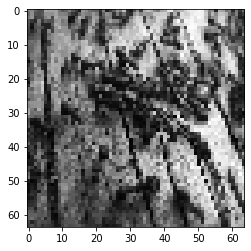

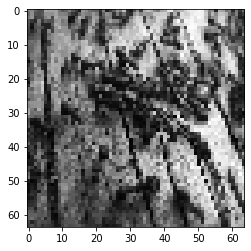

In [36]:
plt.imshow(X_0, cmap = 'gray') # X_0: 하나의 데이터만 저장
plt.show()

plt.imshow(X_2[0], cmap = 'gray') # X_2: 여러 데이터 포함 -> 위치값 표시 

In [ ]:
from matplotlib import cm

if y[0] == 0: print('개미 이미지')
elif y[0] == 1: print('벌 이미지')
else: print('이미지 확인 불가')


if y[0] == 0: 
  print('개미 이미지')
elif y[0] == 1: 
  print('벌 이미지')
else: 

plt.imshow(X_0, cmap = 'gray') # X_0: 하나의 데이터만 저장
plt.show()

plt.imshow(X_2[0], cmap = 'gray') # X_2: 여러 데이터 포함 -> 위치값 표시 

In [ ]:
## 결론) npy, npz 파일 형식이 달라도 가공해서 동일하게 사용가능!
